<a href="https://colab.research.google.com/github/bgteffera/streamlit-practice/blob/main/Dataquest_S%26P500_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Collect data**

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf

sp500 = yf.Ticker('^GSPC')

In [ ]:
sp500 = sp500.history(period = 'max')

In [ ]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-10-10 00:00:00-04:00,3647.510010,3652.169922,3588.100098,3612.389893,3834320000,0,0
2022-10-11 00:00:00-04:00,3595.860107,3640.659912,3568.449951,3588.840088,4759030000,0,0
2022-10-12 00:00:00-04:00,3590.830078,3608.340088,3573.860107,3577.030029,4006830000,0,0


In [ ]:
sp500.index

DatetimeIndex(['1950-01-03 00:00:00-05:00', '1950-01-04 00:00:00-05:00',
               '1950-01-05 00:00:00-05:00', '1950-01-06 00:00:00-05:00',
               '1950-01-09 00:00:00-05:00', '1950-01-10 00:00:00-05:00',
               '1950-01-11 00:00:00-05:00', '1950-01-12 00:00:00-05:00',
               '1950-01-13 00:00:00-05:00', '1950-01-16 00:00:00-05:00',
               ...
               '2022-10-03 00:00:00-04:00', '2022-10-04 00:00:00-04:00',
               '2022-10-05 00:00:00-04:00', '2022-10-06 00:00:00-04:00',
               '2022-10-07 00:00:00-04:00', '2022-10-10 00:00:00-04:00',
               '2022-10-11 00:00:00-04:00', '2022-10-12 00:00:00-04:00',
               '2022-10-13 00:00:00-04:00', '2022-10-14 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=18316, freq=None)

##**Cleaning and visualizing data**

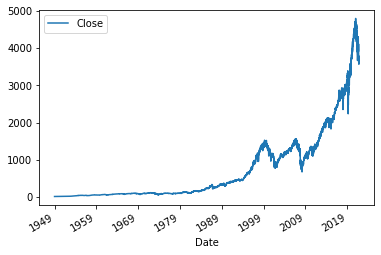

In [ ]:
sp500.plot.line(y='Close', use_index='True')

In [ ]:
del sp500['Dividends']
del sp500['Stock Splits']

## **Setting up ML target**

Will the price go up or down tomorrow? 
  
  
  Predicting trend is more important than predicting absolute price

###**Strategy to set up target**

Make a new column called "tomorrow" and use pandas shift method to show tomorrows price. Then set up target such that it asks is tomorrows price > todays price

In [ ]:
sp500['Tomorrow']=sp500["Close"].shift(-1)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-10-10 00:00:00-04:00,3647.510010,3652.169922,3588.100098,3612.389893,3834320000,3588.840088
2022-10-11 00:00:00-04:00,3595.860107,3640.659912,3568.449951,3588.840088,4759030000,3577.030029
2022-10-12 00:00:00-04:00,3590.830078,3608.340088,3573.860107,3577.030029,4006830000,3669.909912


In [ ]:
sp500['Target']= (sp500["Tomorrow"]>sp500["Close"]).astype(int)
# This will return a boolean unless you convert to integer

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03 00:00:00-05:00,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04 00:00:00-05:00,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05 00:00:00-05:00,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06 00:00:00-05:00,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09 00:00:00-05:00,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-10-10 00:00:00-04:00,3647.510010,3652.169922,3588.100098,3612.389893,3834320000,3588.840088,0
2022-10-11 00:00:00-04:00,3595.860107,3640.659912,3568.449951,3588.840088,4759030000,3577.030029,0
2022-10-12 00:00:00-04:00,3590.830078,3608.340088,3573.860107,3577.030029,4006830000,3669.909912,1


###**Clean up historical data too old to be in model**

In [ ]:
sp500 = sp500.loc["1990-01-01":].copy()

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-10-10 00:00:00-04:00,3647.510010,3652.169922,3588.100098,3612.389893,3834320000,3588.840088,0
2022-10-11 00:00:00-04:00,3595.860107,3640.659912,3568.449951,3588.840088,4759030000,3577.030029,0
2022-10-12 00:00:00-04:00,3590.830078,3608.340088,3573.860107,3577.030029,4006830000,3669.909912,1


## **Build initial ML model**

### **Which model to start with and why?**


1.   Resistant to overfitting due to decision tree averages

1.   Runs quickly
2.   Pick up non linear relationships



In [ ]:
from sklearn.ensemble import RandomForestClassifier
#n_estimator = number of individual decision trees to be trained
#min sample split helps protect against overfitting
#random state of 1 means random sets occur in same sequence. Allows us to rerun and improve model 
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state = 1 )

###**How to select training data for timeseries**



1.   Must not allow future data to "leak" into model
2.   Use all of the rows except the last 100  on the training data



In [ ]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']

In [ ]:
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

###**How to determine accuracy of ML model**

Use precision score to measure precision, or (true positivies)/(total positives)

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
preds = model.predict(test[predictors])
preds

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
import pandas as pd

In [ ]:
preds = pd.Series(preds, index = test.index)
preds

Date
2022-05-24 00:00:00-04:00    1
2022-05-25 00:00:00-04:00    0
2022-05-26 00:00:00-04:00    1
2022-05-27 00:00:00-04:00    1
2022-05-31 00:00:00-04:00    1
                            ..
2022-10-10 00:00:00-04:00    0
2022-10-11 00:00:00-04:00    1
2022-10-12 00:00:00-04:00    1
2022-10-13 00:00:00-04:00    1
2022-10-14 00:00:00-04:00    1
Length: 100, dtype: int64

In [ ]:
precision_score(test["Target"], preds)

0.3924050632911392

###**How to plot prediction**

In [ ]:
combined = pd.concat([test["Target"], preds], axis = 1)

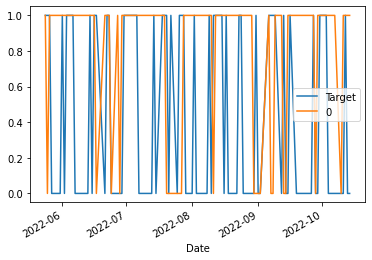

In [ ]:
combined.plot()

##**Building a Backtesting System**



1.   Create a prediction function
2.   Create a backtest function


###**How to create prediction function**

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name = 'Predictions')
  combined = pd.concat([test["Target"], preds], axis =1)
  return combined

In [ ]:
combined

,Target,0
Date,,
2022-05-24 00:00:00-04:00,1,1
2022-05-25 00:00:00-04:00,1,0
2022-05-26 00:00:00-04:00,1,1
2022-05-27 00:00:00-04:00,0,1
2022-05-31 00:00:00-04:00,0,1
...,...,...
2022-10-10 00:00:00-04:00,0,0
2022-10-11 00:00:00-04:00,0,1
2022-10-12 00:00:00-04:00,1,1


###**How to create Backtest**

In [ ]:
#Every trading year has 250 days, start = 2500 allows 10 years of training
#step number of days in 1 cycle, days of a trading year

def backtest(data, model, predictors, start = 2500, step = 250):
  all_predictions = []

  for i in range (start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [ ]:
predictions = backtest(sp500, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

0    3341
1    2421
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5320115654688146

###**How to set up a benchmark**

In [ ]:
# How to look at percentage of days where market actually went up as a benchmark
# This value shows buying/selling every day > algorithm
# Divide days where the price increases by total number of rows(=days)
predictions['Target'].value_counts()/predictions.shape[0]

1    0.534884
0    0.465116
Name: Target, dtype: float64

## **Adding more predictors to our model**

We will create a variety of rolling averages. 

In [ ]:
from sklearn.utils.fixes import sp
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"]/rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-10 00:00:00-04:00,3647.510010,3652.169922,3588.100098,3612.389893,3834320000,3588.840088,0,0.996240,0.0,0.972600,1.0,0.908551,25.0,0.845623,119.0,1.013644,543.0
2022-10-11 00:00:00-04:00,3595.860107,3640.659912,3568.449951,3588.840088,4759030000,3577.030029,0,0.996730,0.0,0.976891,0.0,0.903545,25.0,0.840720,118.0,1.006804,543.0
2022-10-12 00:00:00-04:00,3590.830078,3608.340088,3573.860107,3577.030029,4006830000,3669.909912,1,0.998352,0.0,0.984733,0.0,0.901933,24.0,0.838630,117.0,1.003260,543.0


In [ ]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-07 00:00:00-04:00,3706.739990,3706.739990,3620.729980,3639.659912,4449660000,3612.389893,0,0.985799,0.0,0.976470,2.0,0.914449,26.0,0.851418,119.0,1.021538,543.0
2022-10-10 00:00:00-04:00,3647.510010,3652.169922,3588.100098,3612.389893,3834320000,3588.840088,0,0.996240,0.0,0.972600,1.0,0.908551,25.0,0.845623,119.0,1.013644,543.0
2022-10-11 00:00:00-04:00,3595.860107,3640.659912,3568.449951,3588.840088,4759030000,3577.030029,0,0.996730,0.0,0.976891,0.0,0.903545,25.0,0.840720,118.0,1.006804,543.0


##**Improving our Model**

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds>=.6]= 1
  preds[preds< .6]= 0
  preds = pd.Series(preds, index=test.index, name = 'Predictions')
  combined = pd.concat([test["Target"], preds], axis =1)
  return combined

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [ ]:
predictions["Predictions"].value_counts()

0.0    3949
1.0     812
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])
#Compare this value with baseline

0.5689655172413793

##**Summary and Next Steps**

Consider exchanges that are running while the US markets are closed. Look for correlations and trends

Add in news

Add in key stocks and key sectors in the S&P500

Increase the resolution (hourly, minute data, tick data)

